
# 4장 분류(classification)

## 4.1 분류의 개요

분류는 대표적인 지도학습 방법이다. **교재 183-184쪽 설명**을 잘 읽어보자.

정형 데이터의 분류 알고리즘으로는 다음과 같은 것들이 있다.

* Naive Bayes 
* Logistic regression 
* **Decision tree**
* Support vector machine 
* Nearest neighbor
* Neural network 
* Ensemble (**Bagging**, Random Forest; **Boosting**, Gradient Boosting, XgBoost, LightGBM; **Stacking** )

교재 4장에서는 `Decision tree`에 이어 `Ensemble` 방법을 중점적으로 공부한다.

(그렇다고 교재에서 다루지 않는 알고리즘들의 성능이 떨어지거나 덜 쓰이는 것은 아니다, 머신러닝 알고리즘들이 워낙 다양해서 모두를 공부하기에는 시간과 지면이 부족해서 그럴 뿐이다). 

앙상블 방법은 서로 다른/또는 같은 여러 알고리즘을 결합한 것으로서 크게 Random Forest를 비롯한 Bagging과 , Gradient Boosting, XgBoost, LightGBM등으로 대표되는 Boosting으로 나눌 수 있다. 

앙상블은 흔히 결정 트리를 기반으로 삼기 때문에 4.2절에서는 먼저 결정 트리에 대해 공부한다. 결정 트리는 직관적으로 매우 이해하기 쉬운 방법이기는 하지만 그 자체만으로는 아주 좋은 분류 방법은 아니다. 하지만 성능이 약한 분류방법을 여럿 결합하는 앙상블 알고리즘에 결정 트리를 이용하면 예측 성능을 높일 수 있다. Random Forest가 바로 그런 것이다.

## 4.2 결정 트리

* root node, leaf node

교재 185쪽의 그림을 보자. 결정 트리의 모양은 우리가 알고 있는 나무를 거꾸로 세운 것과 같다. 또는 물에 비친 나무의 그림자를 생각해도 좋겠다. 나무의 경우 뿌리가 가장 아래에 있고 줄기와 잎이 그 위에 달려있지만 결정 트리에서는 맨 위에 있는 '노드 (node)'가 출발점 즉 뿌리노드(root node)가 되기 때문이다. 

결정 트리 모형에서는 모든 데이터가 다 들어있는 뿌리노드에서 시작하여 데이터들이 어떤 조건을 만족시키는가 여부에 따라 두 개의 노드로 가지가 갈라진다. 즉 데이터를 두 개의 집단으로 나누는 것이다. 그런 과정을 거듭하다가 맨 아래편 마지막 나뭇잎 노드, 즉 '리프 노드(leaf node)'에 이르러 더 이상 가지를 나누지 않고 마무리된다.

[사이킷런 홈페이지의 결정트리 설명](https://scikit-learn.org/stable/modules/tree.html)을 보면 iris data를 결정 트리 방법으로 분류하는 그림이 나온다. (graph visualization software인 Graphviz로 그린 그림인데 교재 192쪽 그림과 비슷하지만 샘플 데이터 수도 다르고 나무 모양도 조금 다르다). 우리는 아래에 있는 교재의 그림으로 결정 트리를 공부해보자. 120개로 이루어진 iris data(train data)에는 네 개의 feature(sepal length in cm, sepal width in cm, petal length in cm, petal width in cm) 변수들과 품종을 나타내는 하나의 class 변수(Iris Setosa, Iris Versicolour, Iris Virginica 세 가지)가 있다.

결정 트리는 그 4개의 feature 변수 가운데 가장 중요한 변수를 하나 골라 그 변수의 값에 따라 데이터의 품종을 예측하는 작업을 반복한다(큰 문제를 작은 문제로 나누어 해결하는 이런 알고리즘을 `'분할 정복(divide and conquer)'`알고리즘이라고도 부른다). 그런데 중요한 변수, 그리고 `가지가 나눠지는 경계가 되는 값`은 어떻게 찾는 걸까? 결정트리는 **Gini, entropy, information gain** 등을 이용한다.

* Gini index

교재 192쪽의 트리 그림은 깊이(depth)가 5인 결정트리를 보여준다. 일단 그런 트리를 만들고 나면 새로운 붓꽃 데이터가 있을 때 root node부터 시작해서 조건을 검토하여 그 붓꽃의 종류를 예측할 수 있다. 그 그림 맨 위의 root node 내부를 잘 살펴보자. 

>`petal length (cm) <= 2.45
gini = 0.667
samples = 120
value = [41, 40, 39]
class = setosa`

맨 위에 있는 `petal length(cm) <= 2.45`는 첫단계의 분류 조건을 나타낸다. 데이터가 그 조건을 만족시키면 왼쪽으로 분류하고 아니면 오른쪽으로 분류한다. 그런 조건을 어떻게 찾았을까? 조건 아래에 있는 `gini = 0.667`을 살펴보자. 흔히 '지니 계수', '지니 불순도' 등으로 불리는 이 값은 그 노드에 들어있는 데이터들이 얼마나 다양한지(또는 순수한지, 균일한지)를 나타낸다(교재 186쪽 그림을 보라). 

결정 트리를 비롯한 분류 알고리즘은 여러가지 클래스가 섞인 데이터를 같은 클래스의 순수한 집단들로 나누려한다. 가령 root node에는 세 종류의 붓꽃이 전혀 분류되지 않은 상태로 각각 41, 40, 39개씩 들어있다. 그 노드에서 각 붓꽃 종류의 확률을 $p(i), ~ i=1, \ldots, 3$라고 할 때 다음 값을 지니 불순도라고 부른다.

$$ {\rm Gini} = \sum_{i=1}^{3} p(i) (1- p(i)) = 1 - \sum_{i=1}^{3} p(i)^2 . $$

만약 $p(1)=1, p(2)=p(3)=0$이면 지니불순도 값은 0이 된다. 즉 노드 전체가 단 하나의 종류로만 이루어진 가장 순수한 노드라는 뜻이다. `지니 불순도(지니 계수) 값이 높을수록 그 노드에는 서로 다른 종류가 섞여있다는 뜻이다. `

root node에서는 $p(1) = 41/120, ~ p(2) = 40/120, ~ p(3)= 39/120$이므로 지니불순도 값은 

$$ {\rm Gini} = \sum_{i=1}^{3} p(i) (1- p(i)) = 0.667 $$

가 된다. 그리고 root node의 맨 아래에 있는 `class = setosa`는 만약 그 단계에서 120개 전체 데이터를 세 종류 중 하나로 분류한다면 가장 빈도가 높은 setosa로 분류하게 된다는 뜻이다. `petal length(cm) <= 2.45`를 기준으로 데이터를 나눈 결과 41:79로 분리되고 왼쪽 41개 데이터는 모두 setosa 품종이므로(그래서 Gini = 0이다, 완전히 순수하다는 뜻) 그 노드는 더 이상 분리할 필요가 없고 두 종류가 섞여있는 오른쪽 노드의 79개만 계속 분류하면 되겠다.

나머지 노드들도 마찬가지 방법으로 해석하면 된다. 사이킷런에서 결정 트리는 **sklearn.tree** 안에 있는 **DecisionTreeClassifier()**를 이용하는데 그 함수는 지니 계수 값을 가장 많이 줄일 수 있는 방향으로 중요한 변수를 찾고 분류 기준값을 찾는다. 

* **entropy, information gain**

지니 계수 이외에 사이킷런에서는 `데이터의 혼잡도를 의미`(줄어들어야 순수도가 향상) 하는 entropy를 기준으로 분류할 수도 있다. 참고로 root node의 entropy는 다음과 같이 계산한다.

$$ {\rm Entropy} = - \sum_{i=1}^{3} p(i) \cdot \log_{2} (p(i)) = 1.585 $$

1-entropy를 정보이득(information gain, IG)이라고 부른다.

$$ {\rm IG = 1 - Entropy}. $$

* 결정 트리 모델의 특징과 parameter

결정트리의 장단점은 **187-8쪽**에 간단히 정리되어있다. 가장 많이 지적되는 문제점은 나무가 너무 복잡해지는 `'과적합'이 생기기 쉽다는 점이다. 이 문제를 피하기 위해` 모형을 만들 때 몇 가지 parameter를 지정할 수 있는데 특히 max_depth, min_samples_split, min_samples_leaf 등이 중요하게 쓰인다. **max_depth**는 `최대 깊이`를 뜻하며 **min_samples_split**는 더 이상 분리하지 않을 `최소 데이터수`를 말한다. 또한 **min_samples_leaf**는 최종 leaf node가 될 수 있는 `최소 데이터 수`를 의미한다(교재 188-9쪽 설명 참조). 

### 결정 트리 모델의 시각화(Decision Tree Visualization)

iris dataset으로 결정 트리 모델 학습과 검증 연습을 해보자. 결정 트리 모델에서는 교재 192쪽 그림처럼 시각화가 중요한데 사이킷런에서는 두 가지 방법을 이용할 수 있다. 

하나는 사이킷런 tree 모듈에서 기본으로 제공하는 **plot_tree()** 함수를 이용하는 것이고 다른 하나는 `Graphviz` 패키지를 이용하는 것이다. 먼저 iris 데이터를 train, test 데이터 둘로 나눈 다음 `DecisionTreeClassifier()`의 객체를 만들어 fit()으로 모델을 훈련시켜보자.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)
 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

**참고**
gini 대신 entropy를 기준으로 하려면 DecisionTreeClassifier 객체를 만들 때 아래와 같이 `criterion= 'entropy'`라고 지정하면 된다.

In [3]:
# dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=156)

# dt_clf.fit(X_train , y_train)

먼저 `plot_tree()` 함수를 이용해서 트리를 그려보자.

[Text(103.01538461538462, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(77.26153846153846, 163.07999999999998, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(128.76923076923077, 163.07999999999998, 'X[3] <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(51.50769230769231, 126.83999999999999, 'X[2] <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(25.753846153846155, 90.6, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(77.26153846153846, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(128.76923076923077, 90.6, 'X[0] <= 5.45\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(103.01538461538462, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(128.769230769

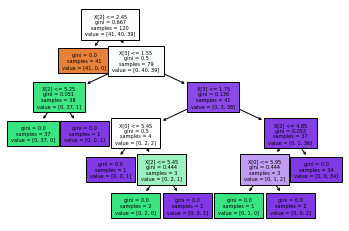

In [4]:
from sklearn.tree import plot_tree
plot_tree(dt_clf, filled=True, fontsize=5)

그림이 제대로 보이지도 않는다. 이번에는 Graphviz를 이용해서 다시 그려보자. Jupyter notebook에서 Graphviz를 이용하려면 prompt에서 아래와 같이 입력해서 패키지를 설치해야한다.

`conda install python-graphviz`

그런 다음 아래와 같이 sklearn.tree 안에 있는 **export_graphviz()** 함수를 부른다. 이 함수는 `out_file=" "`에서 지정한 이름의 dot 언어로 된 .dot 파일을 만들어준다.

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

이제 ` graphviz` 패키지를 부르고 위에서 만든 .dot 파일을 읽고 그림을 그린다(Graphviz와 dot file에 대해서는 2.6절에서 이미 공부한 바 있으니 그 수업자료를 참조할 것).

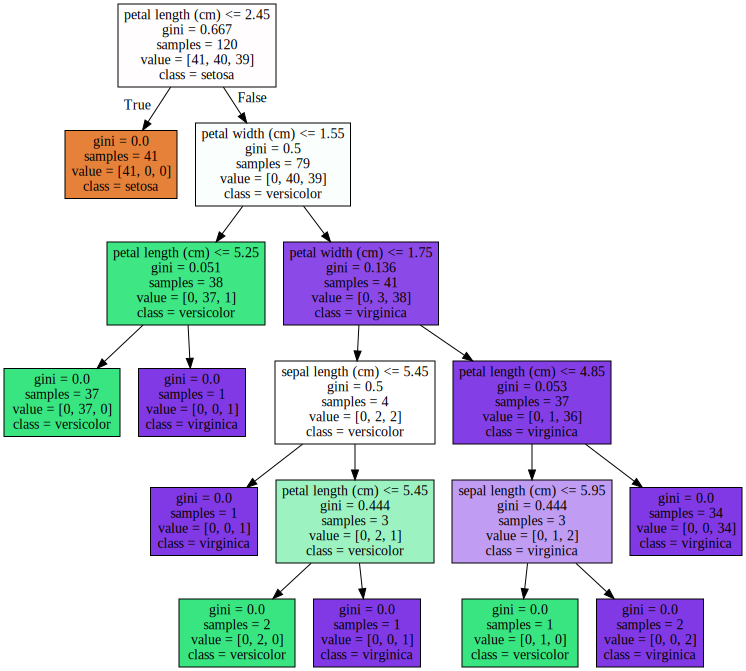

In [6]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

다음으로는 `DecisionTreeClassifier()` 객체의 `feature_importances_` 속성을 이용하여 feature들의 중요도를 비교해보자. (교재 197-8).

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

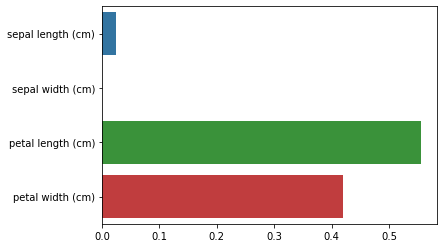

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### 결정 트리 과적합(Decision Tree Overfitting)

실제 데이터가 아닌 가상의 테스트용 데이터를 만들기 위해 사이킷런이 제공하는 함수(`sklearn.datasets` 안에 있는 **make_classification()**)를 이용하여 과적합 문제에 대해 알아보자.

교재 199쪽의 코드에서는 2차원 시각화를 위해 2개의 feature변수(`X_features`)와 3개의 범주가 있는 target 변수 데이터(`y_labels`)를 만들어서 결정 트리를 학습하고 결정 경계를 시각화해서 과적합에 대해 알아본다. 따로 지정하지 않으면 make_classification() 함수는 분류 연습을 위해 기본 샘플 수 100개의 데이터를 랜덤하게 만들어준다.

In [8]:
from sklearn.datasets import make_classification

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

`n_features=2` 라고 지정했기 때문에 두 개의 feature 변수 데이터(X_features)가 100개씩 만들어진다. 또 `n_classes=3` 이라고 지정했으므로 범주가 셋(0,1,2)인 target 변수 데이터(y_labels)가 100개 만들어진다.

In [9]:
print(X_features.shape, y_labels.shape)

(100, 2) (100,)


In [10]:
y_labels

array([0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0])

In [11]:
X_features[:5]

array([[ 0.12041909, -1.68941375],
       [ 1.09665605,  1.79445113],
       [ 0.88426577,  1.43370121],
       [ 0.95048011, -0.56202253],
       [ 1.04421447,  0.02899023]])

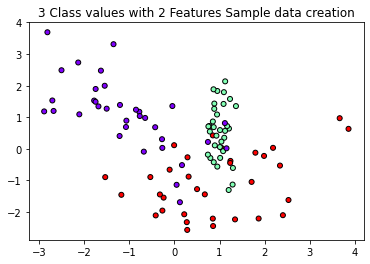

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', 
            edgecolor='k')
plt.show()

위의 그림에 나타난 점들이 교재 그림의 점보다 더 잘 보이는 이유는 colormap을 나타내는 `cmap='rainbow'`라는 옵션을 추가한 덕분이다(더 알아보려면 인터넷 검색을 이용). 

아래에 있는 visualize_boundary() 함수 자체에 대해서는 세부적으로 알 필요 없다. 세 집단의 경계를 나타내는 그림을 그리기 위한 함수인데 결과에서 보듯 아무런 인자 없이 만든 결정 트리와 `min_samples_leaf = 6`이라고 지정하고 만든 결정 트리를 비교하고 있다.

교재 200쪽의 그림과 설명에서 알 수 있듯이 처음 그림은 이상치 데이터에 민감하게 반응하여 결정경계가 복잡하게 만들어졌지만 두번째 그림에서는 이상치에 세밀하게 반응하지 않는 분류 규칙이 만들어진 것을 알 수 있다. 이와 같이 적절한 옵션을 추가해서 의사결정나무 모형의 과적합 문제에 대응할 수 있다.

In [13]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, 
                                                                               num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

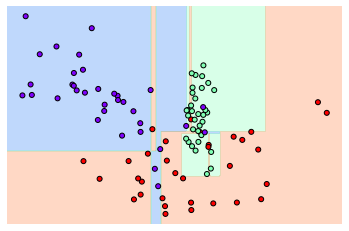

In [14]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

트리 생성 조건을 지정하지 않았을 경우 과적합, 모형이 복잡해지는 경우가 있다.

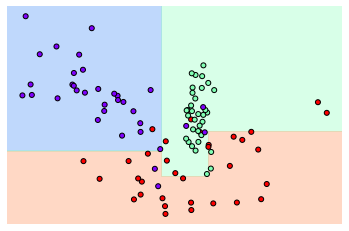

In [15]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

위의 두개 차이점 min_samples_leaf=6 (교재 200쪽)

적절한 옵션을 지정해 모형을 간단하게 만들어줄 필요가 있다.

### 결정 트리 실습 - Human Activity Recognition (`생략 가능`) 

실습할 사용자행동인식(human activity recognition) 데이터에 대한 설명은 교재 201-202쪽을 보자. [UCI Machine Learning Repository, Human Activity Recognition Data Set](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)를 방문하여 데이터를 다운로드한 다음 작업 폴더에 압축을 풀고 UCI HAR Dataset 폴더의 이름을 `human_activity` 로 바꾸자. 우리가 분석할 데이터의 피처 이름이 그 폴더 안에 있는 `features.txt` 파일에 있다. 그 파일은 값들이 공백들로 구분된 txt 파일이므로 `sep = '\s+'` 옵션을 포함하는 `pd.read_csv()` 함수로 읽어서 데이터프레임으로 만들자.

train data와 test data는  `human_activity` 폴더 안에 있는 `tarin`, `test` 폴더에 각각 들어있으며 역시 `pd.read_csv` 함수로 읽을 수 있다.

**참고**

아래 분석 과정을 코드마다 세밀하게 살펴볼 필요는 없다. 일단 

* 데이터 다운로드 
* 데이터 전처리  
* 결정 트리를 이용한 분류  
* `GridSearchCV()`를 이용한 max_depth에 따른 정확도 비교 
* test data에서 max_depth에 따른 정확도 비교 
* 여러 max_depth, min_samples_split 값에 따른 정확도 비교 
* 최적 hyper parameter 모델을 test data에서 검증하기 
* 피처들의 중요도 비교

등으로 이루어지는 전체적인 분석 과정만 대략 파악하면 된다. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', 
                        header=None, names=['column_index','column_name'])
feature_name_df.head()

In [ ]:
# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 10개만 출력 확인
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

이름만으로는 뭔지 알 수 없다. 교재 203쪽의 설명을 참조하자. 게다가 이들 이름 가운데에는 중복되는 이름도 있는데 판다스의 데이터프레임에서는 열이름을 겹치게 붙일 수 없으므로 수정해야한다. 확인해보자.

**중복된 피처명을 확인**

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df

아래에서 보듯 3번씩 중복되는 열 이름이 모두 42개 있다.

In [ ]:
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

중복 feature 이름에 `_1, _2`를 추가로 부여해서 구분해주는 함수 `get_new_feature_name_df()`를 정의하자.

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new12 = (lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0]) 
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(new12,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

In [ ]:
print(y_train['action'].value_counts())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]


In [ ]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

In [ ]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()